In [22]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from statistics import mode
from math import sqrt
from random import choice

In [23]:
df = pd.read_csv("thermaldata.csv")
df.columns = [0, 1, 2, 3, 4, "Type"]
df['distance'] = float("inf")

df.head()

,0,1,2,3,4,Type,distance
0,19.8,15.3,0.981,5.11,0.01820,Nanocrystalline Diamond Thermal Spreader,inf
1,18.5,14.5,1.650,6.10,0.05310,Nanocrystalline Diamond Thermal Spreader,inf
2,18.0,16.5,1.230,5.05,0.02950,Zirconium Dioxide Ceramic Heat Sink,inf
3,18.7,15.8,1.160,7.02,0.02590,Zirconium Dioxide Ceramic Heat Sink,inf
4,17.7,14.6,0.653,4.60,0.00949,Zirconium Dioxide Ceramic Heat Sink,inf


In [24]:
target = pd.Series([16.4,20.11,0.699,8.07,0.0105,"X"])
target_df = pd.DataFrame({c: [t] for c, t in zip(df.columns, target)})
target_df

,0,1,2,3,4,Type
0,16.4,20.11,0.699,8.07,0.0105,X


In [25]:
df['distance'] = (sum((df.loc[:,i]-target[i])**2 for i in range(5))) ** 0.5
df = df.sort_values('distance', ascending=True)

k = 7
#knn = df.nsmallest(k, 'distance')
knn = list(df.head(k).Type)
print(*knn, sep="\n")
print(f"\t\t{k}: {mode(knn)}")

Zirconium Dioxide Ceramic Heat Sink
Zirconium Dioxide Ceramic Heat Sink
Graphene-Coated Carbon Fiber Sheet
Graphene-Coated Carbon Fiber Sheet
Nanocrystalline Diamond Thermal Spreader
Zirconium Dioxide Ceramic Heat Sink
Zirconium Dioxide Ceramic Heat Sink
		7: Zirconium Dioxide Ceramic Heat Sink


In [26]:
#EE
print(*df['Type'].unique(), sep="\n")

Zirconium Dioxide Ceramic Heat Sink
Graphene-Coated Carbon Fiber Sheet
Nanocrystalline Diamond Thermal Spreader
Boron Nitride Nanotube Composite
Reinforced Carbon-Carbon (RCC) Shield Tile
Silicon Oxycarbide Shield Tile
Diamond-Like Carbon (DLC) Coated Radiator
Aerogel-Infused Carbon Fiber Panel
Phenolic Impregnated Carbon Ablator (PICA)
Graphene Nanoplatelet Thermal Interface Material
Ceramic Matrix Composite... EASTEREGG: CALCULATOR


In [79]:
"Zirconium Dioxide Ceramic Heat Sink".upper()

'ZIRCONIUM DIOXIDE CERAMIC HEAT SINK'

In [61]:
#df.drop(columns=["distance"]).to_csv('thermaldata.csv', index=False)

   frequency  wavelength    type
0         10           7  Cosmic
1          9           1   Solar
2          7           2   Solar
3          8           3  Cosmic
4         10           2   Solar
5          9           3   Solar
6          1           5  Cosmic
7          4           5  Cosmic
8          9           4   Solar
9          3           3   Solar
Solar---Solar---Solar
Cosmic---Cosmic---Solar
Cosmic---Cosmic---Solar
SCC


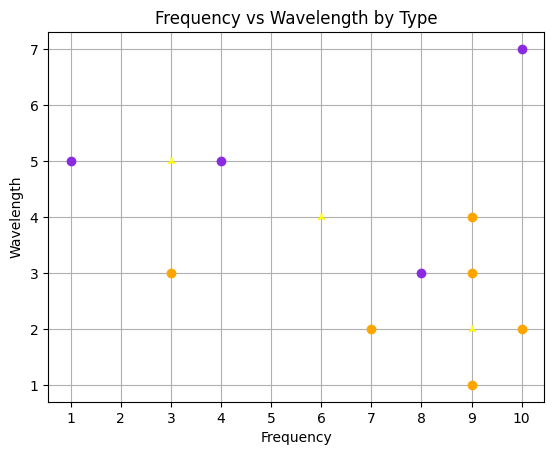

In [20]:
with open("sample.txt") as f:
    waves = [tuple(map(int, w.split(",")))for w in f.readline().strip().split()]
    rad = pd.read_csv(f, names=['frequency', 'wavelength', 'type'])

print(rad)

results = []

for n, wave in enumerate(waves):
    wavedata = rad.copy()
    wavedata.columns = [0, 1, "Type"]
    wavedata["Distance"] = float("inf")
    
    target = pd.Series(wave)
    wavedata['Distance'] = ((wavedata.loc[:,0]-target[0])**2 + (wavedata.loc[:,1]-target[1])**2) ** 0.5

    k = 3
    wavedata = wavedata.sort_values('Distance', ascending=True)
    knn = list(wavedata.head(k).Type)
    res = max(knn, key=knn.count)
    print("---".join(sorted(knn)))
    results.append(res[0])
print("".join(results))

data = pd.read_csv("sample.csv")

plt.scatter(data["frequency"][data["type"] == "Solar"], data["wavelength"][data["type"] == "Solar"], label="Solar", c="orange", zorder=10)
plt.scatter(data["frequency"][data["type"] == "Cosmic"], data["wavelength"][data["type"] == "Cosmic"], label="Cosmic", c="blueviolet", zorder=10)

for i, x, wave in zip(range(1,10), results, waves):
    plt.scatter(wave[0], wave[1], label="Target", c="yellow", marker="2", zorder=10) #"red" if x=="S" else "green"
    plt.xlabel("Frequency")
    plt.ylabel("Wavelength")
    plt.title("Frequency vs Wavelength by Type")

    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.grid(True, zorder=0)
    plt.savefig(f'plot{i}.png', transparent=True, bbox_inches='tight')
plt.show()

## SOLVE

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

with open("data.txt") as f:
    waves = [tuple(map(int, w.split(",")))for w in f.readline().strip().split()]
    rad = pd.read_csv(f, names=['frequency', 'wavelength', 'type'])
print(f"{waves=}")
rad.head()

waves=[(3, 14), (11, 6), (17, 15), (2, 4), (11, 19)]


,frequency,wavelength,type
0,12,7,Solar
1,13,1,Cosmic
2,7,7,Solar
3,20,18,Cosmic
4,12,4,Solar


In [9]:
results = []

for n, wave in enumerate(waves):
    wavedata = rad.copy()
    wavedata.columns = [0, 1, "Type"]
    wavedata["Distance"] = float("inf")
    
    target = pd.Series(wave)
    wavedata['Distance'] = ((wavedata.loc[:,0]-target[0])**2 + (wavedata.loc[:,1]-target[1])**2) ** 0.5

    k = 7
    wavedata = wavedata.sort_values('Distance', ascending=True)
    knn = list(wavedata.head(k).Type)
    res = max(knn, key=knn.count)
    print("---".join(sorted(knn)))
    results.append(res[0])
print("".join(results))

Cosmic---Cosmic---Cosmic---Solar---Solar---Solar---Solar
Cosmic---Cosmic---Solar---Solar---Solar---Solar---Solar
Cosmic---Cosmic---Cosmic---Cosmic---Cosmic---Solar---Solar
Cosmic---Cosmic---Solar---Solar---Solar---Solar---Solar
Cosmic---Cosmic---Cosmic---Cosmic---Solar---Solar---Solar
SSCSC


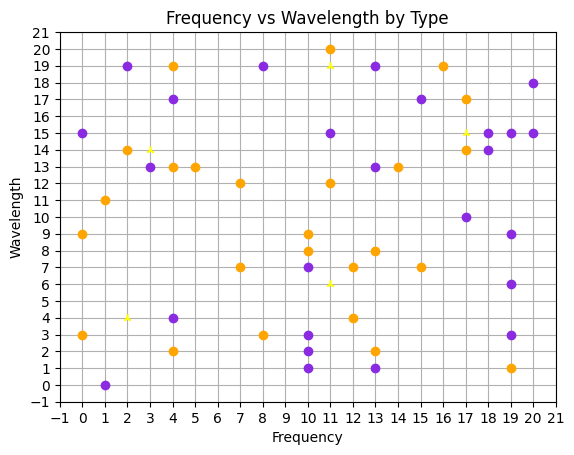

In [10]:
data = pd.read_csv("radiation.csv")

plt.scatter(data["Frequency"][data["Type"] == "Solar"], data["Wavelength"][data["Type"] == "Solar"], label="Solar", c="orange", zorder=10)
plt.scatter(data["Frequency"][data["Type"] == "Cosmic"], data["Wavelength"][data["Type"] == "Cosmic"], label="Cosmic", c="blueviolet", zorder=10)

for i, x, wave in zip(range(1,10), results, waves):
    plt.scatter(wave[0], wave[1], label="Target", c="yellow", marker="2", zorder=10) #"red" if x=="S" else "green"
    plt.xlabel("Frequency")
    plt.ylabel("Wavelength")
    plt.title("Frequency vs Wavelength by Type")

    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.grid(True, zorder=0)
    plt.savefig(f'plot{i}.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
from PIL import Image, ImageSequence

def process_gif(input_path, output_path):
    with Image.open(input_path) as im:
        frames = []
        durations = []
        for frame in ImageSequence.Iterator(im):
            frames.append(frame.copy().convert('RGBA'))
            durations.append(frame.info['duration'])

        frames[0].save(
            output_path,
            save_all=True,
            append_images=frames[1:],
            loop=None,
            duration=durations,
            disposal=2
        )


input_gif = "plots.gif"
output_gif = "plots_norep.gif"

process_gif(input_gif, output_gif)
print("DONE")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jefethepug/Desktop/Python Course/challenges/building/06_Graph_Theory_KNN /rolling.gif'

In [ ]:
dd